In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
torch.manual_seed(1)

In [4]:
def training_model(model, x, y):
    epochs_max = 20000
    arr_of_epochs,arr_of_losses=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        pred = model(x)  
        loss = fun_loss_val(pred, y)
        opt.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        opt.step() 
        arr_of_epochs.append(epoch)
        arr_of_losses.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == epochs_max:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (arr_of_losses[-1] < 0.001):
            if abs(arr_of_losses[-3] - arr_of_losses[-2]) < 1.0e-05 and abs(arr_of_losses[-2] - arr_of_losses[-1]) < 1.0e-05:
                print("Convergence reached for loss:",arr_of_losses[-1])
                not_converged = False
                
    return arr_of_epochs, arr_of_losses, pred

In [5]:
x = np.expand_dims(np.arange(-2.0, 2.0, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(400, 1)
(400, 1)


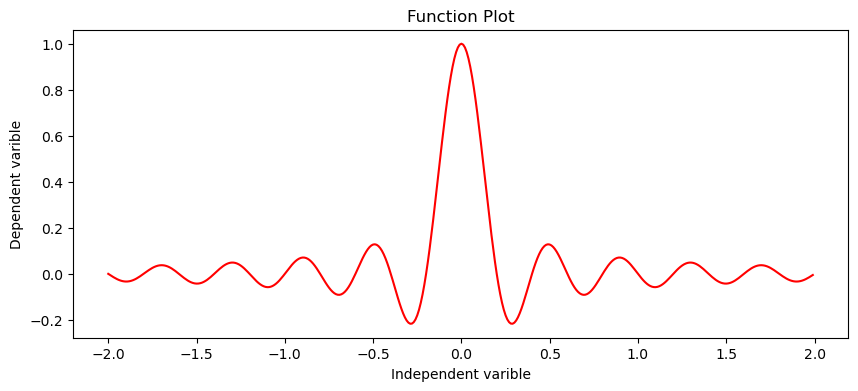

In [6]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

## Model

In [7]:
class Model_1(nn.Module):
    def __init__(self,):
        super(Model_1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x
 
model_1 = Model_1()

In [8]:
opt = torch.optim.RMSprop(model_1.parameters(), lr = 1e-2, weight_decay = 1e-3)
fun_loss_val = torch.nn.MSELoss()  # mean squared loss
py_params = sum(p.numel() for p in model_1.parameters())
print(py_params)
m1_arr_of_epochs, m1_arr_of_losses, m1_pred = training_model(model_1, x, y)

571
epoch: 500, loss = 0.0471
epoch: 1000, loss = 0.0471
epoch: 1500, loss = 0.0471
epoch: 2000, loss = 0.0471
epoch: 2500, loss = 0.0471
epoch: 3000, loss = 0.0471
epoch: 3500, loss = 0.0471
epoch: 4000, loss = 0.0471
epoch: 4500, loss = 0.0471
epoch: 5000, loss = 0.0471
epoch: 5500, loss = 0.0471
epoch: 6000, loss = 0.0471
epoch: 6500, loss = 0.0471
epoch: 7000, loss = 0.0471
epoch: 7500, loss = 0.0471
epoch: 8000, loss = 0.0471
epoch: 8500, loss = 0.0471
epoch: 9000, loss = 0.0471
epoch: 9500, loss = 0.0471
epoch: 10000, loss = 0.0471
epoch: 10500, loss = 0.0471
epoch: 11000, loss = 0.0471
epoch: 11500, loss = 0.0471
epoch: 12000, loss = 0.0471
epoch: 12500, loss = 0.0471
epoch: 13000, loss = 0.0471
epoch: 13500, loss = 0.0471
epoch: 14000, loss = 0.0471
epoch: 14500, loss = 0.0471
epoch: 15000, loss = 0.0471
epoch: 15500, loss = 0.0471
epoch: 16000, loss = 0.0471
epoch: 16500, loss = 0.0471
epoch: 17000, loss = 0.0471
epoch: 17500, loss = 0.0471
epoch: 18000, loss = 0.0471
epoch: 1

## Model 2 

In [10]:
class Model_2(nn.Module):
    def __init__(self,):
        super(Model_2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x
 
model_2 = Model_2()

In [11]:
opt = torch.optim.RMSprop(model_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
fun_loss_val = torch.nn.MSELoss() 
py_params = sum(p.numel() for p in model_2.parameters())
print(py_params)
m2_arr_of_epochs, m2_arr_of_losses, m2_pred = training_model(model_2, x, y)


572
epoch: 500, loss = 0.0038
epoch: 1000, loss = 0.0027
epoch: 1500, loss = 0.0024
epoch: 2000, loss = 0.0022
epoch: 2500, loss = 0.0020
epoch: 3000, loss = 0.0021
epoch: 3500, loss = 0.0018
epoch: 4000, loss = 0.0018
epoch: 4500, loss = 0.0017
epoch: 5000, loss = 0.0017
epoch: 5500, loss = 0.0016
epoch: 6000, loss = 0.0016
epoch: 6500, loss = 0.0015
epoch: 7000, loss = 0.0015
epoch: 7500, loss = 0.0015
epoch: 8000, loss = 0.0013
epoch: 8500, loss = 0.0013
epoch: 9000, loss = 0.0015
epoch: 9500, loss = 0.0013
epoch: 10000, loss = 0.0011
epoch: 10500, loss = 0.0012
epoch: 11000, loss = 0.0013
epoch: 11500, loss = 0.0011
epoch: 12000, loss = 0.0011
epoch: 12500, loss = 0.0016
epoch: 13000, loss = 0.0012
epoch: 13500, loss = 0.0010
Convergence reached for loss: 0.0009974026


## Model 3

In [12]:
class Model_3(nn.Module):
    def __init__(self,):
        super(Model_3, self).__init__()
        self.linear1 = nn.Linear(1, 200)
        self.predict = nn.Linear(200, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x
 
model_3 = Model_3()

In [13]:
opt = torch.optim.RMSprop(model_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
fun_loss_val = torch.nn.MSELoss()
py_params = sum(p.numel() for p in model_3.parameters())
print(py_params)
m3_arr_of_epochs, m3_arr_of_losses, m3_pred = training_model(model_3, x, y)

601
epoch: 500, loss = 0.0282
epoch: 1000, loss = 0.0224
epoch: 1500, loss = 0.0191
epoch: 2000, loss = 0.0165
epoch: 2500, loss = 0.0146
epoch: 3000, loss = 0.0131
epoch: 3500, loss = 0.0119
epoch: 4000, loss = 0.0109
epoch: 4500, loss = 0.0101
epoch: 5000, loss = 0.0094
epoch: 5500, loss = 0.0088
epoch: 6000, loss = 0.0083
epoch: 6500, loss = 0.0080
epoch: 7000, loss = 0.0076
epoch: 7500, loss = 0.0073
epoch: 8000, loss = 0.0070
epoch: 8500, loss = 0.0068
epoch: 9000, loss = 0.0066
epoch: 9500, loss = 0.0064
epoch: 10000, loss = 0.0063
epoch: 10500, loss = 0.0061
epoch: 11000, loss = 0.0060
epoch: 11500, loss = 0.0059
epoch: 12000, loss = 0.0058
epoch: 12500, loss = 0.0057
epoch: 13000, loss = 0.0057
epoch: 13500, loss = 0.0056
epoch: 14000, loss = 0.0055
epoch: 14500, loss = 0.0056
epoch: 15000, loss = 0.0055
epoch: 15500, loss = 0.0054
epoch: 16000, loss = 0.0054
epoch: 16500, loss = 0.0054
epoch: 17000, loss = 0.0054
epoch: 17500, loss = 0.0054
epoch: 18000, loss = 0.0053
epoch: 1

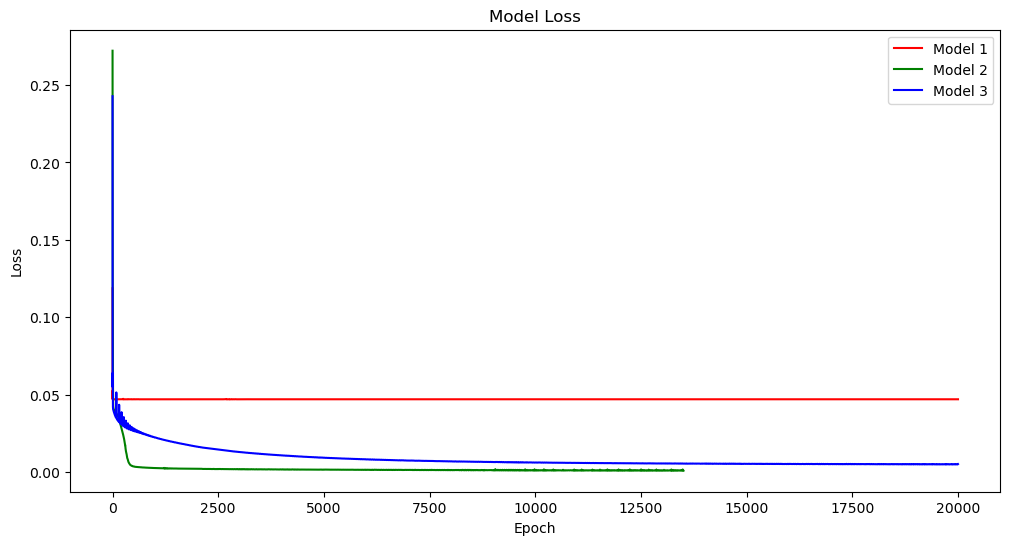

In [14]:
plt.figure(figsize=(12,6))
plt.plot(m1_arr_of_epochs, m1_arr_of_losses, color = "r")
plt.plot(m2_arr_of_epochs, m2_arr_of_losses, color = "g")
plt.plot(m3_arr_of_epochs, m3_arr_of_losses, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

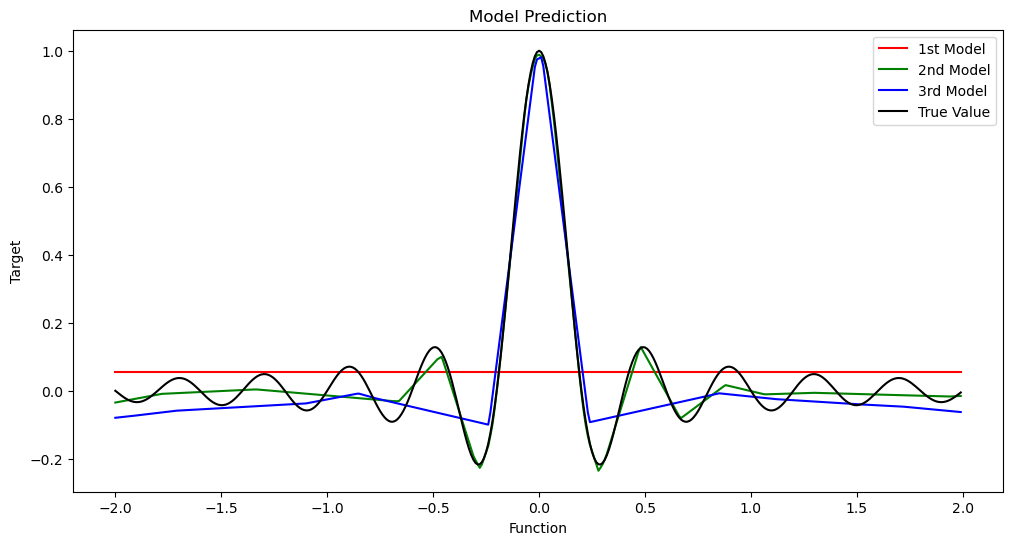

In [15]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_pred.data, color="r", label = '1st Model')
plt.plot(x, m2_pred.data, color="g", label = '2nd Model')
plt.plot(x, m3_pred.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model pred')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

# Function 2

In [16]:
torch.manual_seed(1)

In [18]:
x = np.expand_dims(np.arange(-2.0, 2.0, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(400, 1)
(400, 1)


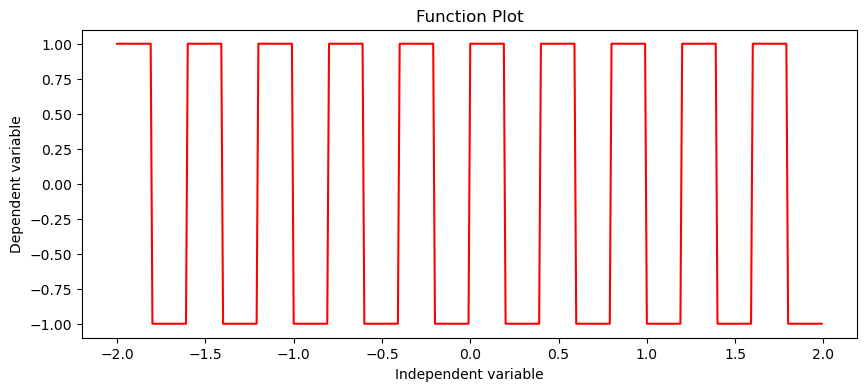

In [19]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")

plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [20]:
model_sign_1 = Model_1()
opt = torch.optim.Adam(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
fun_loss_val = torch.nn.MSELoss()  # mean squared loss
py_params = sum(p.numel() for p in model_sign_1.parameters())
print(py_params)
m1_arr_of_epochs, m1_arr_of_losses, m1_pred = training_model(model_sign_1, x, y)

571
epoch: 500, loss = 0.9715
epoch: 1000, loss = 0.8943
epoch: 1500, loss = 0.8160
epoch: 2000, loss = 0.6552
epoch: 2500, loss = 0.6193
epoch: 3000, loss = 0.5909
epoch: 3500, loss = 0.5745
epoch: 4000, loss = 0.5634
epoch: 4500, loss = 0.5536
epoch: 5000, loss = 0.5311
epoch: 5500, loss = 0.4858
epoch: 6000, loss = 0.4385
epoch: 6500, loss = 0.4100
epoch: 7000, loss = 0.3939
epoch: 7500, loss = 0.3817
epoch: 8000, loss = 0.3737
epoch: 8500, loss = 0.3677
epoch: 9000, loss = 0.3632
epoch: 9500, loss = 0.3593
epoch: 10000, loss = 0.3571
epoch: 10500, loss = 0.3544
epoch: 11000, loss = 0.3519
epoch: 11500, loss = 0.3499
epoch: 12000, loss = 0.3505
epoch: 12500, loss = 0.3472
epoch: 13000, loss = 0.3461
epoch: 13500, loss = 0.3450
epoch: 14000, loss = 0.3437
epoch: 14500, loss = 0.3424
epoch: 15000, loss = 0.3416
epoch: 15500, loss = 0.3406
epoch: 16000, loss = 0.3402
epoch: 16500, loss = 0.3382
epoch: 17000, loss = 0.3385
epoch: 17500, loss = 0.3367
epoch: 18000, loss = 0.3359
epoch: 1

In [21]:
model_sign_2 = Model_2()
opt = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
fun_loss_val = torch.nn.MSELoss() 
py_params = sum(p.numel() for p in model_sign_2.parameters())
print(py_params)
m2_arr_of_epochs, m2_arr_of_losses, m2_pred = training_model(model_sign_2, x, y)

572
epoch: 500, loss = 0.9832
epoch: 1000, loss = 0.7100
epoch: 1500, loss = 0.5633
epoch: 2000, loss = 0.5005
epoch: 2500, loss = 0.4644
epoch: 3000, loss = 0.4311
epoch: 3500, loss = 0.3256
epoch: 4000, loss = 0.3113
epoch: 4500, loss = 0.3040
epoch: 5000, loss = 0.3018
epoch: 5500, loss = 0.2977
epoch: 6000, loss = 0.2948
epoch: 6500, loss = 0.2922
epoch: 7000, loss = 0.2899
epoch: 7500, loss = 0.2886
epoch: 8000, loss = 0.2873
epoch: 8500, loss = 0.2877
epoch: 9000, loss = 0.2852
epoch: 9500, loss = 0.2844
epoch: 10000, loss = 0.2850
epoch: 10500, loss = 0.2824
epoch: 11000, loss = 0.2813
epoch: 11500, loss = 0.2795
epoch: 12000, loss = 0.2785
epoch: 12500, loss = 0.2853
epoch: 13000, loss = 0.2770
epoch: 13500, loss = 0.2760
epoch: 14000, loss = 0.2753
epoch: 14500, loss = 0.2752
epoch: 15000, loss = 0.2736
epoch: 15500, loss = 0.2728
epoch: 16000, loss = 0.2724
epoch: 16500, loss = 0.2687
epoch: 17000, loss = 0.2647
epoch: 17500, loss = 0.2613
epoch: 18000, loss = 0.2601
epoch: 1

## Model 3

In [23]:
model_sign_3 = Model_3()
opt = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-2, weight_decay = 1e-3)
fun_loss_val = torch.nn.MSELoss()
py_params = sum(p.numel() for p in model_sign_3.parameters())
print(py_params)
m3_arr_of_epochs, m3_arr_of_losses, m3_pred = training_model(model_sign_3, x, y)

601
epoch: 500, loss = 0.8836
epoch: 1000, loss = 0.8451
epoch: 1500, loss = 0.8036
epoch: 2000, loss = 0.7668
epoch: 2500, loss = 0.7378
epoch: 3000, loss = 0.7090
epoch: 3500, loss = 0.6898
epoch: 4000, loss = 0.6710
epoch: 4500, loss = 0.6546
epoch: 5000, loss = 0.6507
epoch: 5500, loss = 0.6358
epoch: 6000, loss = 0.6191
epoch: 6500, loss = 0.6142
epoch: 7000, loss = 0.5961
epoch: 7500, loss = 0.6035
epoch: 8000, loss = 0.5806
epoch: 8500, loss = 0.5789
epoch: 9000, loss = 0.5751
epoch: 9500, loss = 0.5653
epoch: 10000, loss = 0.5605
epoch: 10500, loss = 0.5523
epoch: 11000, loss = 0.5523
epoch: 11500, loss = 0.5439
epoch: 12000, loss = 0.5443
epoch: 12500, loss = 0.5360
epoch: 13000, loss = 0.5573
epoch: 13500, loss = 0.5326
epoch: 14000, loss = 0.5279
epoch: 14500, loss = 0.5315
epoch: 15000, loss = 0.5549
epoch: 15500, loss = 0.5207
epoch: 16000, loss = 0.5165
epoch: 16500, loss = 0.5129
epoch: 17000, loss = 0.5261
epoch: 17500, loss = 0.5088
epoch: 18000, loss = 0.5070
epoch: 1

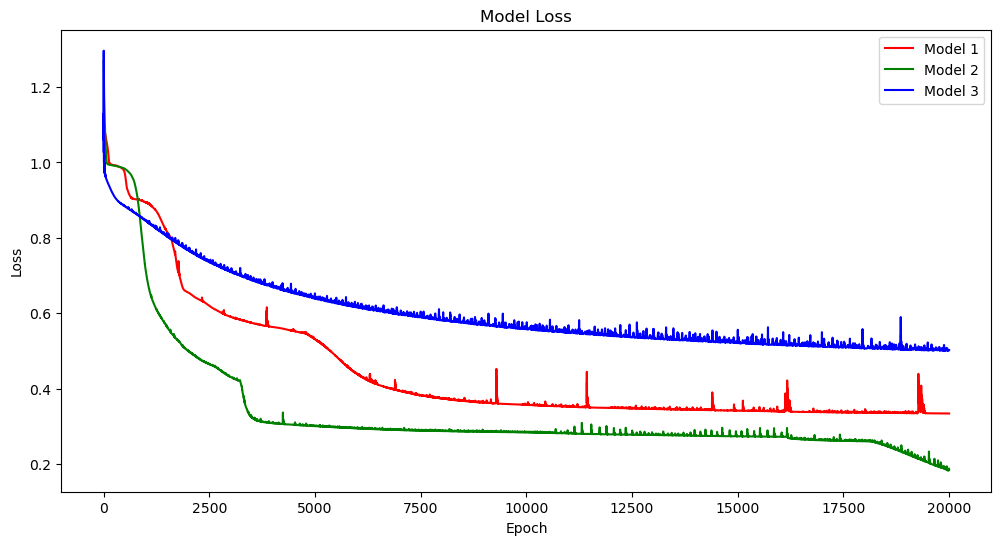

In [24]:
plt.figure(figsize=(12,6))
plt.plot(m1_arr_of_epochs, m1_arr_of_losses, color = "r")
plt.plot(m2_arr_of_epochs, m2_arr_of_losses, color = "g")
plt.plot(m3_arr_of_epochs, m3_arr_of_losses, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

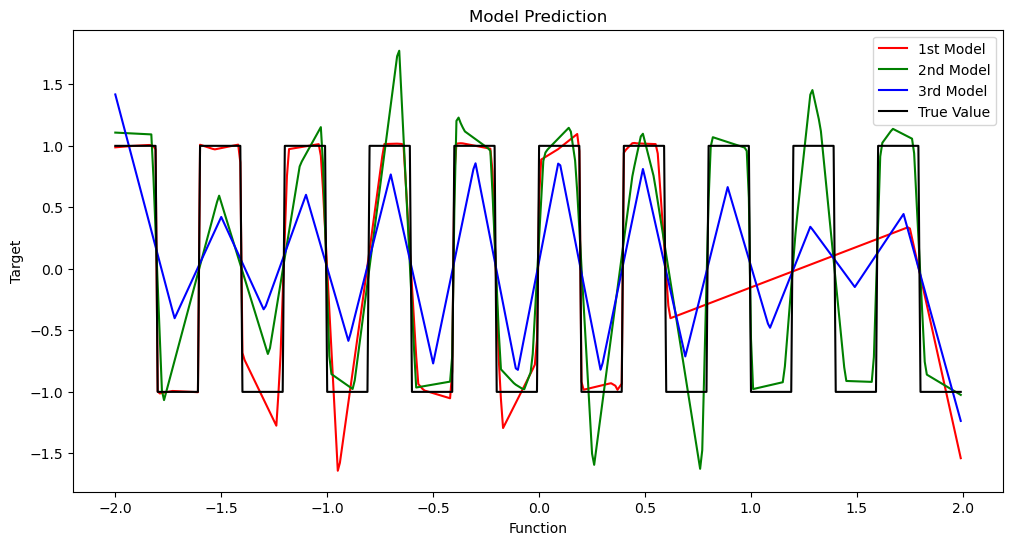

In [25]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_pred.data, color="r", label = '1st Model')
plt.plot(x, m2_pred.data, color="g", label = '2nd Model')
plt.plot(x, m3_pred.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model pred')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()